<a href="https://colab.research.google.com/github/PIYALI-bhunia/MultimodelDataPreprocessing/blob/main/WordCloud_tobacco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import pathlib

In [5]:
data_root = pathlib.Path('/content/drive/MyDrive/tobaco_OCR/')

for item in data_root.iterdir():
  print(item)

/content/drive/MyDrive/tobaco_OCR/Scientific
/content/drive/MyDrive/tobaco_OCR/Resume
/content/drive/MyDrive/tobaco_OCR/Report
/content/drive/MyDrive/tobaco_OCR/Note
/content/drive/MyDrive/tobaco_OCR/Memo
/content/drive/MyDrive/tobaco_OCR/News
/content/drive/MyDrive/tobaco_OCR/Letter
/content/drive/MyDrive/tobaco_OCR/Form
/content/drive/MyDrive/tobaco_OCR/Email
/content/drive/MyDrive/tobaco_OCR/ADVE


In [6]:
def get_file_paths_and_labels(data_root):
  text_paths = [str(path) for path in data_root.glob('*/*.txt')]
  return text_paths

In [7]:
text_paths= get_file_paths_and_labels(data_root)
text_paths

['/content/drive/MyDrive/tobaco_OCR/Scientific/2020226023.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2028875721.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/PUBLICATIONS003667-3.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2074406815.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/10406749_10406751.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2021644184_4185.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2022945385.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/87125423_87125428.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/50287561-7618.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/PUBLICATIONS030901-0.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2082798720_8753.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/2024371262.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/60163219_60163222.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scientific/87638550_87638558.txt',
 '/content/drive/MyDrive/tobaco_OCR/Scienti

In [8]:
texts = []
for text_path in text_paths:
  with open(text_path, 'r') as f:
    texts.append(f.read())

In [9]:
df = pd.DataFrame(list(zip(text_paths, texts)),
               columns =['path', 'text'])
df

path  \
0     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
1     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
2     /content/drive/MyDrive/tobaco_OCR/Scientific/P...   
3     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
4     /content/drive/MyDrive/tobaco_OCR/Scientific/1...   
...                                                 ...   
3477  /content/drive/MyDrive/tobaco_OCR/ADVE/2064932...   
3478  /content/drive/MyDrive/tobaco_OCR/ADVE/2070715...   
3479  /content/drive/MyDrive/tobaco_OCR/ADVE/2061000...   
3480  /content/drive/MyDrive/tobaco_OCR/ADVE/2084426...   
3481  /content/drive/MyDrive/tobaco_OCR/ADVE/5127256...   

                                                   text  
0     PROJECT TITLE: Project Tomorrow CON F{ 0 EN I ...  
1     PAGE 0\nDe. W. Fink\nVice Director Research\nF...  
2     Bf). yas- 737 fet /970\nCre part)\nTHE VETERAN...  
3     Measurement of the Sampling Efficiency of ‘Cur...  
4     H\na\n—_ #\n786\nNew Scientest 29 Septerober 1...  
...                                                 ...  
3477  as\nKent Golden Lights Menthol #107\nPeople 1/...  
3478  Dare to be More:\na\nta\n© 1986 (11R.J. REYNOL...  
3479                                       \n2061000301  
3480  \n\n\n\neS\nMARIBORO L #835\nCOUNTRY WEEKLY\n2...  
3481                                                     

[3482 rows x 2 columns]

In [10]:
import re
df['text'] = [re.sub(r'[^\w\s]','',s) for s in df['text']]
df['text']  = [s.replace('\n','') for s in df['text']]
df

path  \
0     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
1     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
2     /content/drive/MyDrive/tobaco_OCR/Scientific/P...   
3     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
4     /content/drive/MyDrive/tobaco_OCR/Scientific/1...   
...                                                 ...   
3477  /content/drive/MyDrive/tobaco_OCR/ADVE/2064932...   
3478  /content/drive/MyDrive/tobaco_OCR/ADVE/2070715...   
3479  /content/drive/MyDrive/tobaco_OCR/ADVE/2061000...   
3480  /content/drive/MyDrive/tobaco_OCR/ADVE/2084426...   
3481  /content/drive/MyDrive/tobaco_OCR/ADVE/5127256...   

                                                   text  
0     PROJECT TITLE Project Tomorrow CON F 0 EN I AL...  
1     PAGE 0De W FinkVice Director ResearchFabriques...  
2     Bf yas 737 fet 970Cre partTHE VETERANS ADMINIS...  
3     Measurement of the Sampling Efficiency of Curr...  
4     Ha_ 786New Scientest 29 Septerober 1977Oe geVe...  
...                                                 ...  
3477  asKent Golden Lights Menthol 107People 1978ah ...  
3478  Dare to be Moreata 1986 11RJ REYNOLDS TOBACCO ...  
3479                                         2061000301  
3480  eSMARIBORO L 835COUNTRY WEEKLY2800te82A 208442...  
3481                                                     

[3482 rows x 2 columns]

In [11]:
import spacy #load spacy
import nltk
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


df['text'] = df['text'].apply(normalize, lowercase=True, remove_stopwords=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df

path  \
0     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
1     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
2     /content/drive/MyDrive/tobaco_OCR/Scientific/P...   
3     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
4     /content/drive/MyDrive/tobaco_OCR/Scientific/1...   
...                                                 ...   
3477  /content/drive/MyDrive/tobaco_OCR/ADVE/2064932...   
3478  /content/drive/MyDrive/tobaco_OCR/ADVE/2070715...   
3479  /content/drive/MyDrive/tobaco_OCR/ADVE/2061000...   
3480  /content/drive/MyDrive/tobaco_OCR/ADVE/2084426...   
3481  /content/drive/MyDrive/tobaco_OCR/ADVE/5127256...   

                                                   text  
0     project title project tomorrow con f 0 en alpr...  
1     page 0de w finkvice director researchfabriques...  
2     bf yas 737 fet 970cre partthe veteran administ...  
3     measurement sample efficiency currently availa...  
4     ha _ 786new scientest 29 septerober 1977oe gev...  
...                                                 ...  
3477  askent golden light menthol 107people 1978ah y...  
3478  dare moreata 1986 11rj reynolds tobacco co6651...  
3479                                         2061000301  
3480  esmariboro l 835country weekly2800te82a 208442...  
3481                                                     

[3482 rows x 2 columns]

In [13]:
#Tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
df['text'] = [nltk.word_tokenize(s) for s in df['text']]
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


path  \
0     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
1     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
2     /content/drive/MyDrive/tobaco_OCR/Scientific/P...   
3     /content/drive/MyDrive/tobaco_OCR/Scientific/2...   
4     /content/drive/MyDrive/tobaco_OCR/Scientific/1...   
...                                                 ...   
3477  /content/drive/MyDrive/tobaco_OCR/ADVE/2064932...   
3478  /content/drive/MyDrive/tobaco_OCR/ADVE/2070715...   
3479  /content/drive/MyDrive/tobaco_OCR/ADVE/2061000...   
3480  /content/drive/MyDrive/tobaco_OCR/ADVE/2084426...   
3481  /content/drive/MyDrive/tobaco_OCR/ADVE/5127256...   

                                                   text  
0     [project, title, project, tomorrow, con, f, 0,...  
1     [page, 0de, w, finkvice, director, researchfab...  
2     [bf, yas, 737, fet, 970cre, partthe, veteran, ...  
3     [measurement, sample, efficiency, currently, a...  
4     [ha, _, 786new, scientest, 29, septerober, 197...  
...                                                 ...  
3477  [askent, golden, light, menthol, 107people, 19...  
3478  [dare, moreata, 1986, 11rj, reynolds, tobacco,...  
3479                                       [2061000301]  
3480  [esmariboro, l, 835country, weekly2800te82a, 2...  
3481                                                 []  

[3482 rows x 2 columns]

In [16]:
bigger_list = list(df["text"])
bigger_list

[['project',
  'title',
  'project',
  'tomorrow',
  'con',
  'f',
  '0',
  'en',
  'alproject',
  'leader',
  'r',
  'w',
  'dwyerperiod',
  'cover',
  'november',
  '1991i',
  'thermal',
  'property',
  'cigaretteabobjective',
  'relate',
  'design',
  'cigarette',
  'thermal',
  'propertiesresults',
  'heat',
  'loss',
  'freely',
  'smolder',
  'cigarette',
  'measure',
  'withacalorimeter',
  'additionally',
  'heat',
  'loss',
  'cigarette',
  'smolder',
  'onfabricfoam',
  'substrate',
  'also',
  'measure',
  'cigarette',
  'smolder',
  'onsubstrates',
  'lose',
  'weight',
  '85',
  'rate',
  'free',
  'burn',
  'thecellulosebased',
  'fabric',
  'use',
  'experimentshas',
  'heat',
  'smolderingcombustion',
  'comparable',
  'cigarette',
  'dimension',
  'thecigarette',
  'coal',
  'unchanged',
  'place',
  'substrate',
  'contrary',
  'tonists',
  'observation',
  'power',
  'output',
  'freely',
  'smolder',
  'cigarettesappearsto',
  'linear',
  'function',
  'mbr',
  'hea

In [18]:
token_words = []
for nested_list in bigger_list:
    token_words += nested_list

for idx, val in enumerate(token_words):
    token_words[idx] = token_words[idx].lower()

print(len(token_words))
token_words

461537


['project',
 'title',
 'project',
 'tomorrow',
 'con',
 'f',
 '0',
 'en',
 'alproject',
 'leader',
 'r',
 'w',
 'dwyerperiod',
 'cover',
 'november',
 '1991i',
 'thermal',
 'property',
 'cigaretteabobjective',
 'relate',
 'design',
 'cigarette',
 'thermal',
 'propertiesresults',
 'heat',
 'loss',
 'freely',
 'smolder',
 'cigarette',
 'measure',
 'withacalorimeter',
 'additionally',
 'heat',
 'loss',
 'cigarette',
 'smolder',
 'onfabricfoam',
 'substrate',
 'also',
 'measure',
 'cigarette',
 'smolder',
 'onsubstrates',
 'lose',
 'weight',
 '85',
 'rate',
 'free',
 'burn',
 'thecellulosebased',
 'fabric',
 'use',
 'experimentshas',
 'heat',
 'smolderingcombustion',
 'comparable',
 'cigarette',
 'dimension',
 'thecigarette',
 'coal',
 'unchanged',
 'place',
 'substrate',
 'contrary',
 'tonists',
 'observation',
 'power',
 'output',
 'freely',
 'smolder',
 'cigarettesappearsto',
 'linear',
 'function',
 'mbr',
 'heat',
 'flux',
 'appear',
 'beindependent',
 'mbrfurther',
 'experiment',
 's

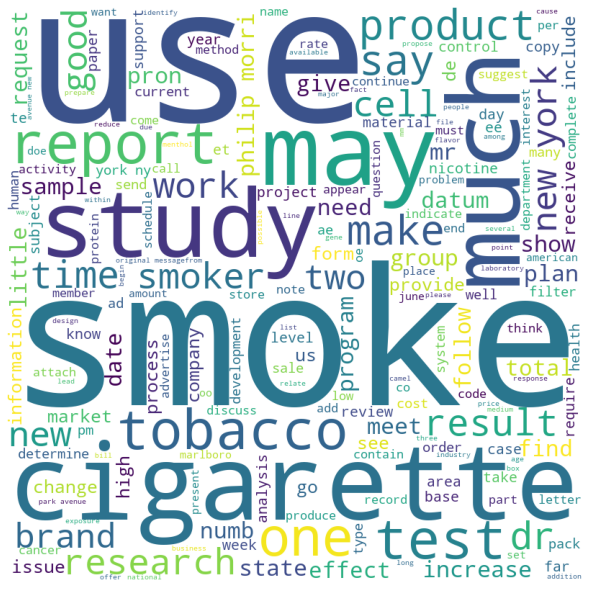

In [19]:
# generating WordCloud
 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
comment_words += " ".join(token_words)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()